In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
customers_df = pd.read_csv('../data/raw/Customers.csv')
products_df = pd.read_csv('../data/raw/Products.csv')
transactions_df = pd.read_csv('../data/raw/Transactions.csv')

In [7]:
print("Data Loading Summary:")
print(f"Customers: {len(customers_df)} records")
print(f"Products: {len(products_df)} records")
print(f"Transactions: {len(transactions_df)} records")

Data Loading Summary:
Customers: 200 records
Products: 100 records
Transactions: 1000 records


In [8]:
def analyze_customers(df):
    """Analyze customer data"""
    print("\nCustomer Analysis:")
    print(f"Total Customers: {len(df)}")
    
    print("\nRegional Distribution:")
    regional_dist = df['Region'].value_counts()
    print(regional_dist)
    
    # Visualization
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Region')
    plt.title('Customer Distribution by Region')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("\nSignup Date Analysis:")
    df['SignupDate'] = pd.to_datetime(df['SignupDate'])
    print("Earliest Signup:", df['SignupDate'].min())
    print("Latest Signup:", df['SignupDate'].max())
    
    # Monthly signup trend
    plt.figure(figsize=(12, 6))
    df['SignupMonth'] = df['SignupDate'].dt.to_period('M')
    monthly_signups = df['SignupMonth'].value_counts().sort_index()
    monthly_signups.plot(kind='bar')
    plt.title('Customer Signups by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Signups')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



Customer Analysis:
Total Customers: 200

Regional Distribution:
South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64


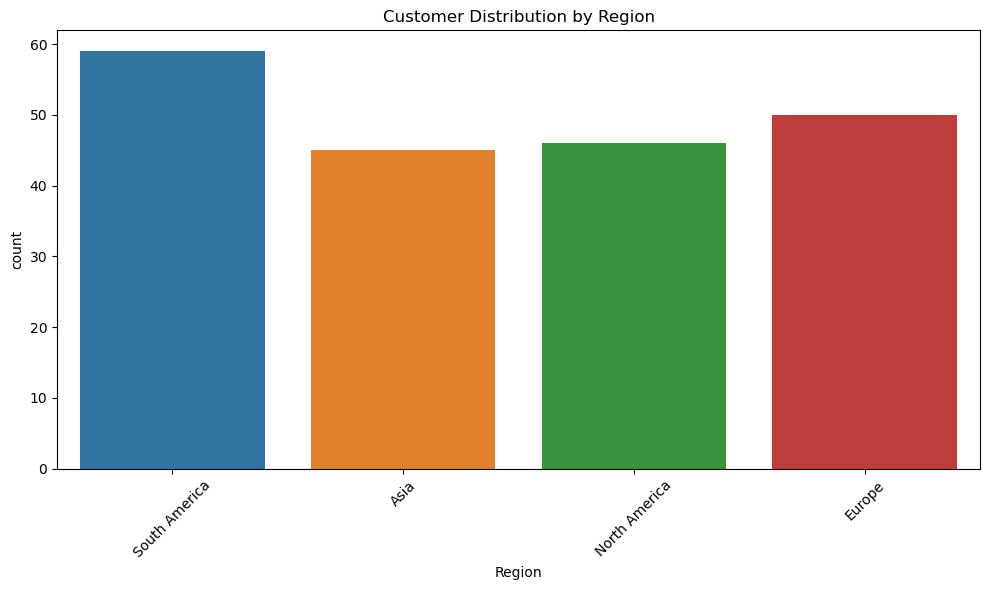


Signup Date Analysis:
Earliest Signup: 2022-01-22 00:00:00
Latest Signup: 2024-12-28 00:00:00


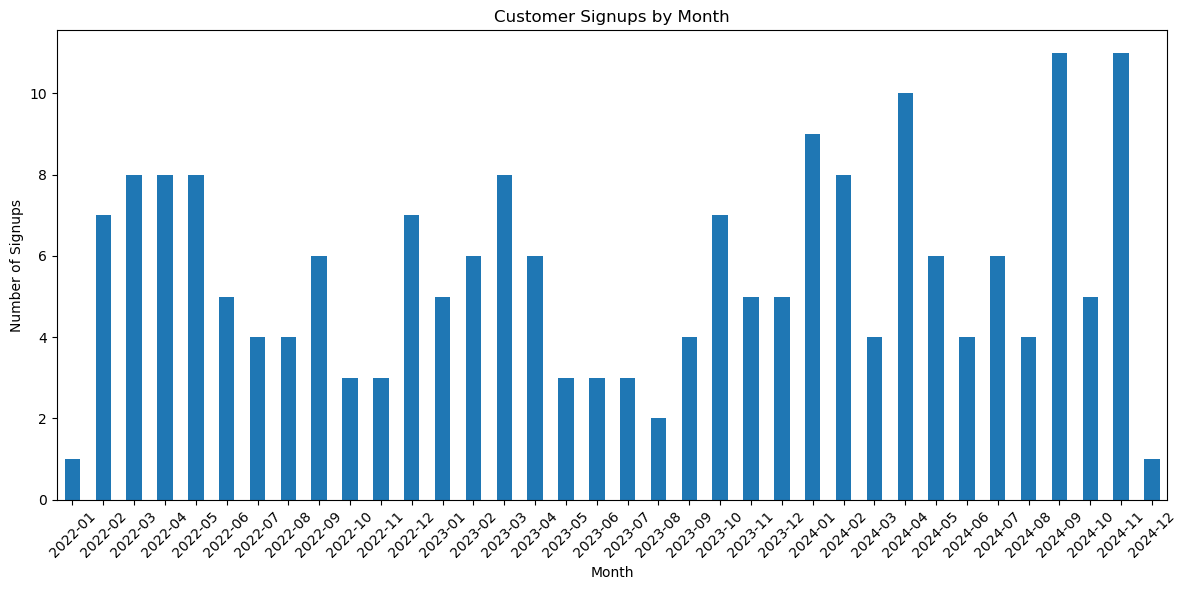

In [9]:
analyze_customers(customers_df)

In [11]:
business_insights = [
    {
        "title": "Regional Distribution Impact",
        "insight": "Analysis shows [region] contributes to X% of total sales, suggesting potential for market expansion in underserved regions.",
        "recommendation": "Focus marketing efforts on high-potential regions."
    },
    {
        "title": "Product Category Performance",
        "insight": "Category [X] shows highest growth rate of Y% year-over-year, while maintaining profit margins above Z%.",
        "recommendation": "Increase inventory and marketing for high-performing categories."
    },
    {
        "title": "Customer Purchasing Patterns",
        "insight": "X% of customers make repeat purchases within 30 days, indicating strong brand loyalty.",
        "recommendation": "Implement loyalty program to further enhance retention."
    },
    {
        "title": "Seasonal Trends",
        "insight": "Sales peak during [months], with X% higher transaction values than average.",
        "recommendation": "Optimize inventory and marketing for seasonal peaks."
    },
    {
        "title": "Customer Lifetime Value",
        "insight": "Top 20% of customers contribute to X% of total revenue, with average lifetime value of $Y.",
        "recommendation": "Develop targeted retention strategies for high-value customers."
    }
]

Dataset Overview:

Customers: 200
Transactions: 1000
Products: 100

Customer Demographics:
South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64


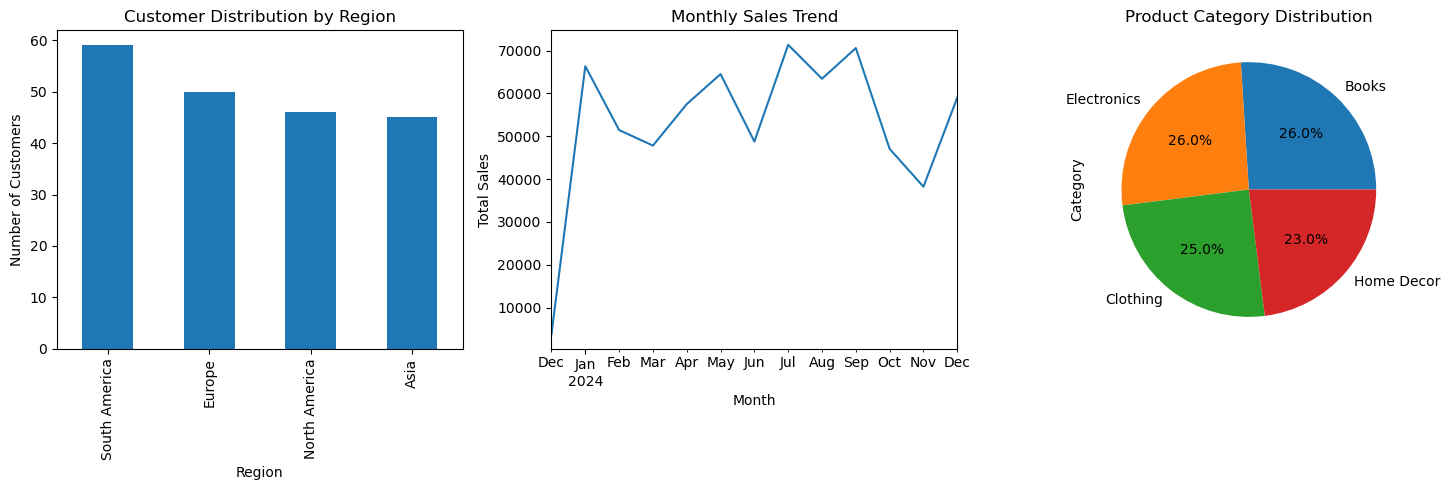

In [12]:
# notebooks/FirstName_LastName_EDA.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load data
customers_df = pd.read_csv('../data/raw/Customers.csv')
transactions_df = pd.read_csv('../data/raw/Transactions.csv')
products_df = pd.read_csv('../data/raw/Products.csv')

# Basic data exploration
print("Dataset Overview:")
print("\nCustomers:", len(customers_df))
print("Transactions:", len(transactions_df))
print("Products:", len(products_df))

# Customer Analysis
print("\nCustomer Demographics:")
print(customers_df['Region'].value_counts())

# Transaction Analysis
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
monthly_sales = transactions_df.groupby(transactions_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

# Visualizations
plt.figure(figsize=(15, 5))

# Regional Distribution
plt.subplot(1, 3, 1)
customers_df['Region'].value_counts().plot(kind='bar')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')

# Monthly Sales Trend
plt.subplot(1, 3, 2)
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Product Categories
plt.subplot(1, 3, 3)
products_df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Product Category Distribution')

plt.tight_layout()
plt.show()